In [1]:
import os

# Define the root directory of your dataset folder
dataset_root = r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer"


In [2]:
#PIL-python library for perform image operations
#tensorflow-for creating neural networks
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#opening an image in train/lung cancer/1st image
image_lungcancer = PIL.Image.open(r"C:\Users\Astel Pauly\Desktop\mul tipple disease prediciton\mini\lung cancer\train\normal\2 - Copy (3).png")

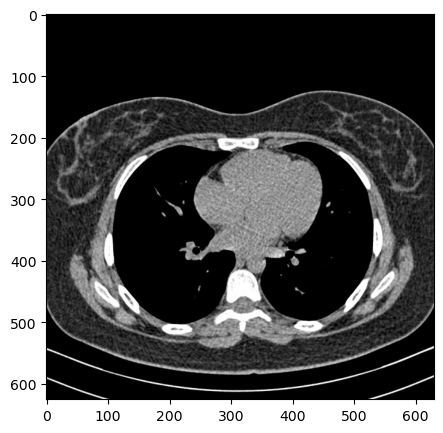

In [4]:
import cv2
plt.figure(figsize=(5,5))
img = cv2.imread(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer\train\normal\2 - Copy (3).png")
plt.imshow(img)
plt.show()


In [5]:
#ImageDataGenerator divides the whole dataset into train,test,val
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#informing the ImageDataGenerator to load the training_dir for training the data
training_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer\train")
training_generator=ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(training_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 613 images belonging to 4 classes.


In [7]:
testing_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer\test")
testing_generator=ImageDataGenerator(rescale=1/255)
data_test = testing_generator.flow_from_directory(testing_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 315 images belonging to 4 classes.


In [8]:
validation_dir =(r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer\valid")
validation_generator=ImageDataGenerator(rescale=1/255)
data_val = validation_generator.flow_from_directory(validation_dir,target_size=(120,120),batch_size=8,class_mode="categorical")

Found 72 images belonging to 4 classes.


In [9]:
labels = {value: key for key, value in data_train.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
1 : large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
2 : normal
3 : squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [10]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(120,120,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256,activation="relu"),
                            tf.keras.layers.Dense(4,activation="softmax")
                            ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [12]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
history = model.fit_generator(data_train,epochs=25,validation_data=data_val)

Epoch 1/25


C:\Users\Astel Pauly\AppData\Local\Temp\ipykernel_11256\584249470.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train,epochs=25,validation_data=data_val)


77/77 [==============================] - 4s 50ms/step - loss: 1.3398 - accuracy: 0.3132 - val_loss: 1.2219 - val_accuracy: 0.4444
Epoch 2/25
77/77 [==============================] - 4s 47ms/step - loss: 1.2056 - accuracy: 0.4258 - val_loss: 1.0652 - val_accuracy: 0.4861
Epoch 3/25
77/77 [==============================] - 4s 46ms/step - loss: 0.9446 - accuracy: 0.5644 - val_loss: 1.6044 - val_accuracy: 0.3750
Epoch 4/25
77/77 [==============================] - 4s 46ms/step - loss: 0.7987 - accuracy: 0.6378 - val_loss: 1.2616 - val_accuracy: 0.5000
Epoch 5/25
77/77 [==============================] - 4s 47ms/step - loss: 0.6933 - accuracy: 0.6835 - val_loss: 1.0843 - val_accuracy: 0.5972
Epoch 6/25
77/77 [==============================] - 4s 46ms/step - loss: 0.5131 - accuracy: 0.7700 - val_loss: 0.9873 - val_accuracy: 0.6667
Epoch 7/25
77/77 [==============================] - 4s 45ms/step - loss: 0.4712 - accuracy: 0.8157 - val_loss: 0.8639 - val_accuracy: 0.6806
Epoch 8/25
77/77 [======

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

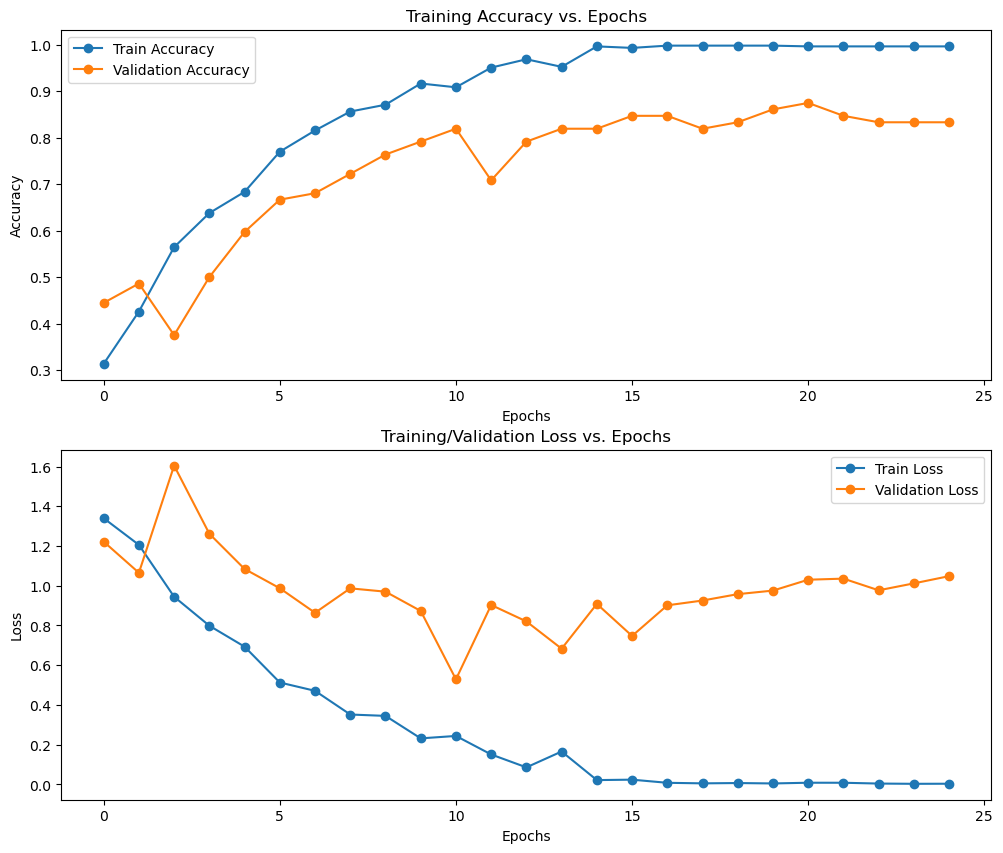

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

In [16]:
#model performs on test data
#model.evaluate(data_test)
test_loss, test_accuracy = model.evaluate(data_test, batch_size=10)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

40/40 [==============================] - 1s 33ms/step - loss: 1.0545 - accuracy: 0.7905
Test Loss:     1.0544919967651367
Test Accuracy: 0.7904762029647827


In [17]:
predictions = model.predict(data_test)

40/40 [==============================] - 2s 36ms/step


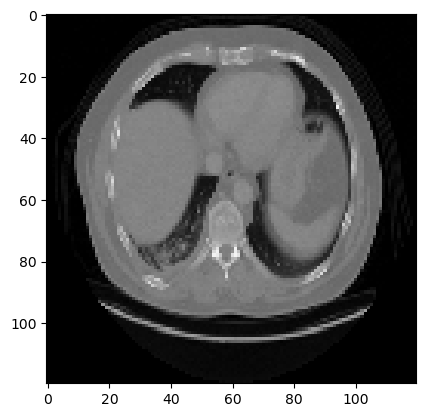

The probability of lung cancer is: [1.8527263e-03 2.4619887e-05 1.4297545e-09 9.9812263e-01]


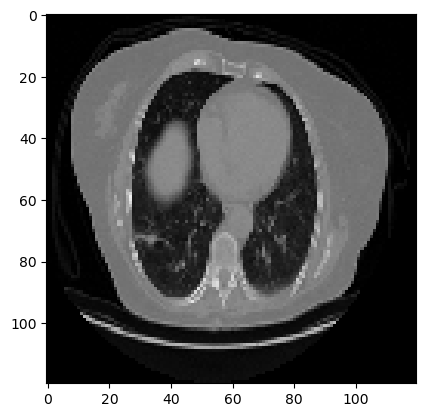

The probability of lung cancer is: [2.5399763e-06 9.9999458e-01 3.9252133e-11 2.8480372e-06]


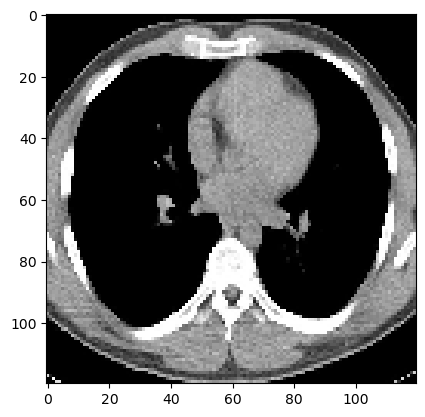

The probability of lung cancer is: [9.9999005e-01 7.5780472e-06 8.4768009e-10 2.2105596e-06]


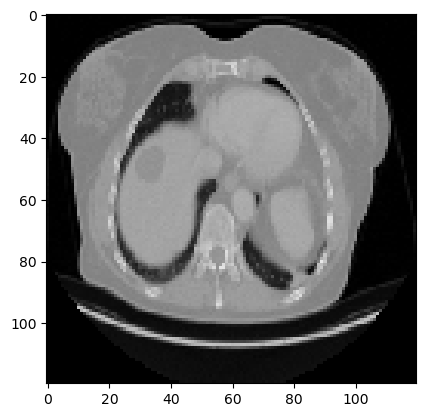

The probability of lung cancer is: [7.9024231e-01 2.3385061e-05 3.6505002e-10 2.0973434e-01]


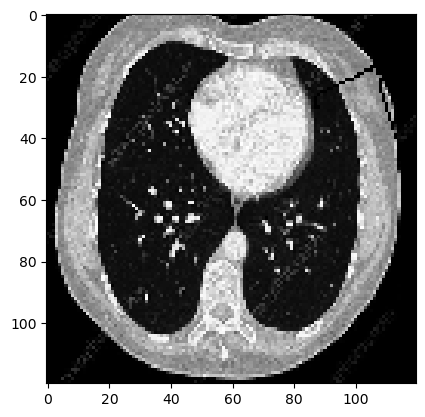

The probability of lung cancer is: [4.3271322e-02 1.0531211e-02 2.8645528e-10 9.4619745e-01]


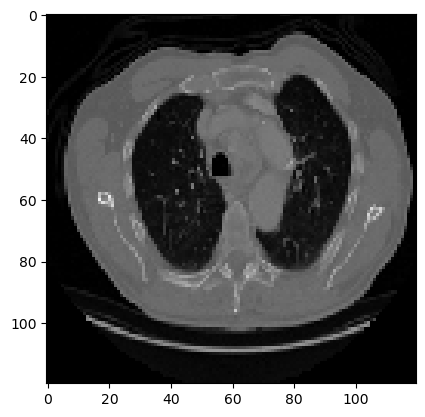

The probability of lung cancer is: [9.6856946e-01 1.8726743e-06 4.8599995e-09 3.1428702e-02]


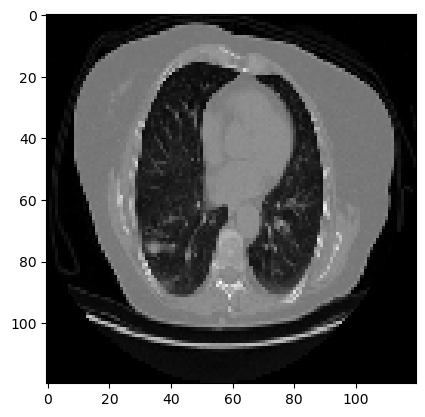

The probability of lung cancer is: [2.8766561e-02 3.4994493e-05 3.4706102e-09 9.7119838e-01]


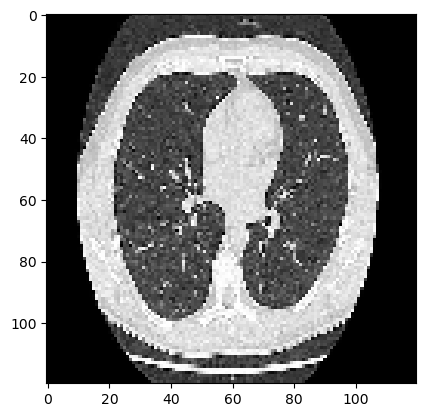

The probability of lung cancer is: [9.98458087e-01 1.54175481e-03 8.71971939e-10 1.02292596e-07]


In [18]:
#range(0,8)=8(since-batch_size is 8)
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of lung cancer is:",predictions[j])

In [19]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np

img_path=r"C:\Users\Astel Pauly\Desktop\multipple disease prediciton\mini\lung cancer\test\normal\8 - Copy (2).png"
img = image.load_img(img_path, target_size=(120, 120))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img1 = cv2.imread(img_path)
output = cv2.resize(img1, (120,120))
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

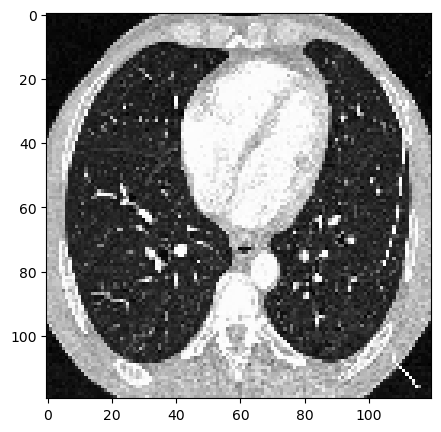

1/1 [==============================] - 0s 18ms/step
Result: normal


In [21]:
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.show()
predicted=model.predict(img_batch)
for i in range(4):
    if predicted[0][0]==True:
        print("Result: adenocarcinoma")
        break
    elif predicted[0][1]==True:
        print("Result: large.cell.carcinoma")
        break
    elif predicted[0][2]==True:
        print("Result: normal")
        break
    elif predicted[0][3]==True:
        print("Result: squamous.cell.carcinoma")
        break
    

In [22]:
# Save the model to a file
model.save('Lung_cancer.h5')
